## Xây dựng các vector đếm số từ với scikit-learn

##### Dự đoán real-fake new

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\fake_or_real_news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
X = df.iloc[:,-2]
y = df.iloc[:,-1]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 53)

In [6]:
count_vectorizer = CountVectorizer(stop_words = 'english')

In [7]:
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [8]:
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


C:\Users\thesh\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##### Phân loại  văn bản với Tfidf Vectorizer

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df= 0.7)

In [12]:
X = df['text']
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=53)

In [13]:
X_train.shape

(4244,)

In [14]:
y_train.shape

(4244,)

In [15]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [16]:
print(tfidf_vectorizer.get_feature_names()[:10]);

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [17]:
print(tfidf_train.A[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### ///////////////////////////////////////////////////////////////////


In [18]:
count_df = pd.DataFrame(count_train.A,columns=count_vectorizer.get_feature_names())

In [19]:
tfidf_df = pd.DataFrame(tfidf_train.A,columns=tfidf_vectorizer.get_feature_names())

C:\Users\thesh\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
difference = set(count_df.columns) - set(tfidf_df.columns)

In [25]:
count_df.equals(tfidf_df)

False

### Naive bayes with Scikit-learn

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [47]:
from sklearn import metrics

In [42]:
lb = LabelEncoder()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=53,test_size=0.33)

In [102]:
print(X_train.shape)
print(y_train.shape)

(4244,)
(4244,)


In [103]:
print(X_train)

2576                                                     
1539    Report Copyright Violation Do you think there ...
5163    The election in 232 photos, 43 numbers and 131...
2615    Email Ever wonder what’s on the mind of today’...
4270    Wells Fargo is Rotting from the Top Down Wells...
                              ...                        
662     —Debby Borza stood before a wall of photos of ...
3261    Presumptive Republican nominee Donald Trump ha...
5883    December's job growth numbers are in, and they...
2933    In a wide-ranging discussion, Trump also said ...
797     Top officials of the Cruz campaign are convinc...
Name: text, Length: 4244, dtype: object


In [114]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_y_test = count_vectorizer.transform(y)

In [105]:
count_test

<2091x57227 sparse matrix of type '<class 'numpy.int64'>'
	with 696020 stored elements in Compressed Sparse Row format>

In [106]:
print('count_train shape:',count_train.shape)
print('count_test shape:',count_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

count_train shape: (4244, 57227)
count_test shape: (2091, 57227)
y_train shape: (4244,)
y_test shape: (2091,)


In [115]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train,y_train)
pred = nb_classifier.predict(count_y_test)

In [117]:
metrics.accuracy_score(y,pred)

0.4994475138121547

In [118]:
y_test.shape

(2091,)

### Confusion Matrix

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

a=metrics.confusion_matrix(y_test, pred)
sns.heatmap(a,cmap='Blues',annot=True)

NameError: name 'metrics' is not defined

### Đào tạo và thử nghiệm mô hình 'Nhận diện tin giả' với CountVectorizer

Trong bài này bạn sẽ đào tạo mô hình “nhận diện tin giả” bằng cách sử dụng các đặc trưng bạn đã xác định và trích xuất. Trong bài tập này, bạn sẽ đào tạo và kiểm tra mô hình Naive Bayes bằng cách sử dụng dữ liệu CountVectorizer.

Các tập huấn luyện và kiểm tra đã được tạo và count_vectorizer, count_train và count_test đã được tính trước.

In [15]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\fake_or_real_news.csv')
y=df.iloc[:,-1]
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
X_test,X_train,y_test,y_train = train_test_split(df['text'],y,test_size = 0.33,random_state=50)

In [16]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [19]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train,y_train)
pred = nb_classifier.predict(count_test)

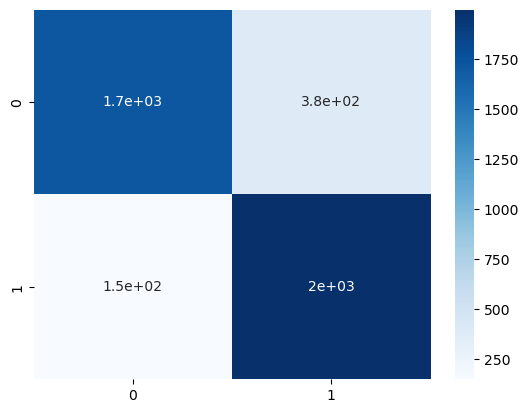

[[1718  382]
 [ 148 1996]]
Accuracy =  0.8751178133836004


In [49]:
### score = metrics.accuracy_score(pred,y_test)
# cm = metrics.confusion_matrix(y_test,pred,labels=['Fake','Real'])
cm = metrics.confusion_matrix(y_test,pred,labels=['FAKE','REAL'])
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()
print(cm)
print('Accuracy = ',score)

### Đào tạo và thử nghiệm mô hình “nhận diện tin giả” với TfidfVectorizer

Trong bài trước bạn đã đánh giá mô hình bằng cách sử dụng CountVectorizer, trong bài này bạn sẽ thực hiện tương tự bằng cách sử dụng TfidfVectorizer với mô hình Naive Bayes.

Các tập training và testing đã được tạo và tfidf_vectorizer, tfidf_train, tfidf_test đã được tính toán. Ngoài ra, MultinomialNB và metrics đã được nhập lần lượt từ sklearn.naive_bayes và sklearn.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf = TfidfVectorizer()
tf_train = tfidf.fit_transform(X_train)
tf_test = tfidf.transform(X_test)

In [59]:
nb_classifier_tf = MultinomialNB()
nb_classifier_tf.fit(tf_train,y_train)
pred_tfidf = nb_classifier_tf.predict(tf_test)

0.775918944392083


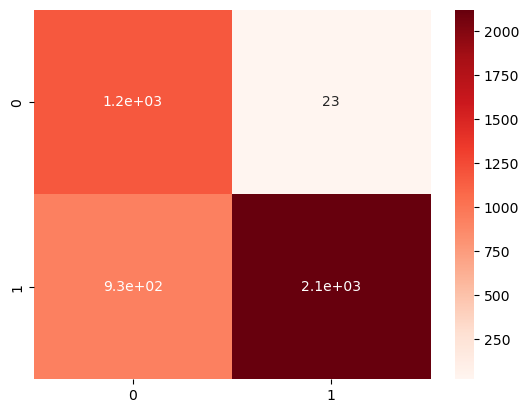

[[1172   23]
 [ 928 2121]]


In [58]:
score = metrics.accuracy_score(pred_tfidf,y_test)
print(score)
cm = metrics.confusion_matrix(pred_tfidf,y_test,labels=['FAKE','REAL'])
sns.heatmap(cm,cmap='Reds',annot=True)
plt.show()
print(cm)